In [1]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style('darkgrid')

In [2]:
## name of datasets that are present in seaborn library
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
## iris dataset
data = sns.load_dataset('iris')

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.shape

(150, 5)

In [6]:
## count the species present in species column
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

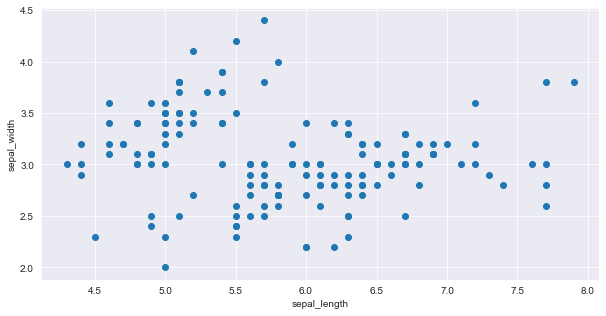

In [7]:
plt.figure(figsize = (10, 5))
plt.scatter(data['sepal_length'], data['sepal_width']);
plt.ylabel('sepal_width')
plt.xlabel('sepal_length');

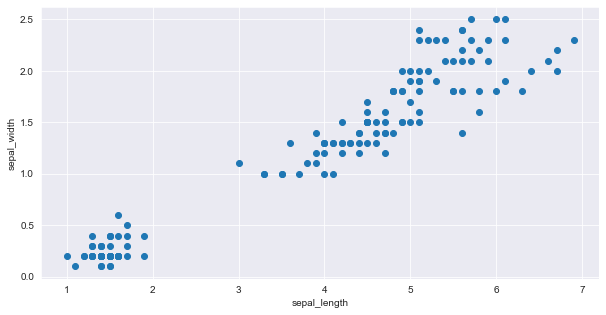

In [8]:
plt.figure(figsize = (10, 5))
plt.scatter(data['petal_length'], data['petal_width'], marker = 'o');
plt.ylabel('sepal_width')
plt.xlabel('sepal_length');

In [9]:
## checking the null values 
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
## converting species into label encoding
def map_species(f):
    if f == 'setosa':
        f = 0
    elif f == 'versicolor':
        f = 1
    elif f == 'virginica':
        f = 2
    return f

In [12]:
data['species'] = data.species.map(map_species)

In [13]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\Users\91773\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91773\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91773\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91773\anaconda3\lib\si

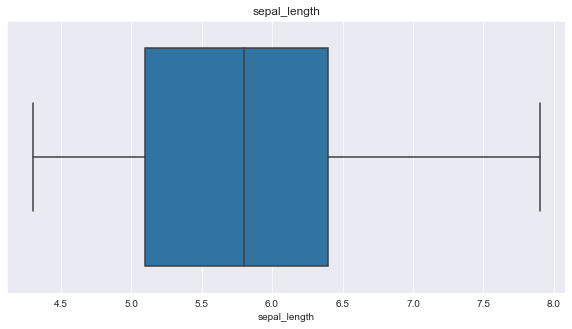

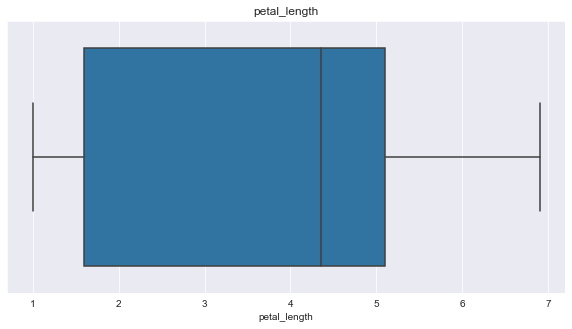

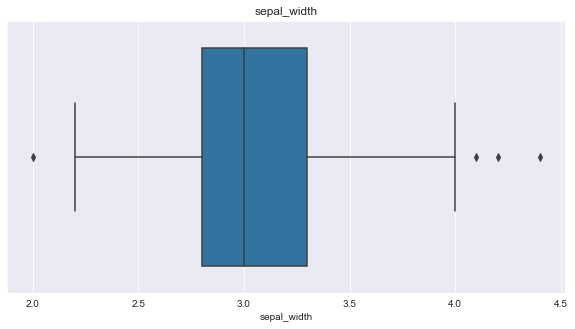

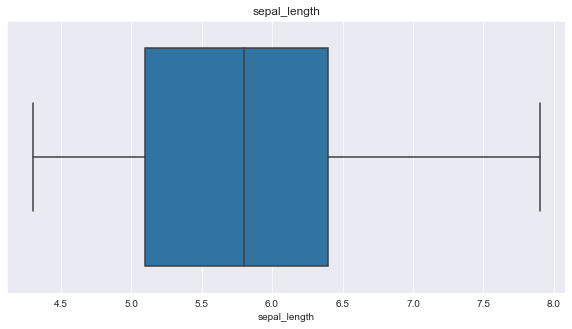

In [14]:
for f in ['sepal_length', 'petal_length', 'sepal_width', 'sepal_length']:
    plt.figure(figsize = (10, 5))
    sns.boxplot(data[f])
    plt.title(f)

In [15]:
## independent and dependent features

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [16]:
## preprocessing

sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

In [18]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [19]:
lg = LogisticRegression()

In [20]:
lg.fit(X_train, Y_train)

LogisticRegression()

In [21]:
pred = lg.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      1.00      0.94         8
           2       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.96      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38


0.9736842105263158



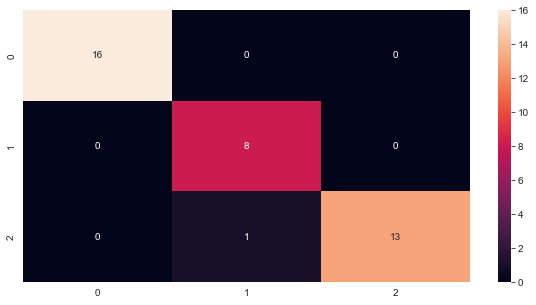

In [22]:
print(classification_report(Y_test, pred))
print()
print(accuracy_score(Y_test, pred))
print()
plt.figure(figsize = (10,5))
sns.heatmap(confusion_matrix(Y_test, pred), annot = True);

In [23]:
pd.DataFrame({'Actual': Y_test,  'Predicted': pred}).head(50)

,Actual,Predicted
0,1,1
1,2,2
2,2,2
3,1,1
4,0,0
5,2,2
6,1,1
7,0,0
8,0,0
9,1,1
